In [31]:
import cv2
from matplotlib import pyplot as plt
import turtle
import numpy as np
import math


class Vertex:
    def __init__(self, vertex_id, data=None, colour=None):
        self.vertex_id = vertex_id
        self.data = data
        self.colour = colour


class Edge:
    def __init__(self, vertex, capacity, isResidual):
        self.vertex = vertex
        self.capacity = capacity
        self.flow = 0
        self.residual = capacity
        self.isResidual = isResidual



class GraphList:
    def __init__(self):
        self.adj_list = {}
        self.idxs = {}


    def insertVertex(self, vertex_id, data=None, colour=None):
        if self.getVertex(vertex_id) is None:
            vertex = Vertex(vertex_id, data, colour)
            self.adj_list[vertex] = []
            self.idxs[vertex] = len(self.idxs)

    def insertEdge(self, vertex1_id, vertex2_id, capacity, isResidual):
        vertex1 = self.getVertex(vertex1_id)
        vertex2 = self.getVertex(vertex2_id)
        if vertex1 and vertex2:
            edge = Edge(vertex2, capacity, isResidual)
            self.adj_list[vertex1].append(edge)

    def deleteVertex(self, vertex_id):
        vertex = self.getVertex(vertex_id)
        if vertex in self.adj_list:
            self.adj_list.pop(vertex)
            self.idxs.pop(vertex)

        for el in self.adj_list.keys():
            i = 0
            while i < len(self.adj_list[el]):
                if self.adj_list[el][i].vertex == vertex:
                    self.adj_list[el].pop(i)
                i += 1

    def deleteEdge(self, vertex1_id, vertex2_id):
        vertex1 = self.getVertex(vertex1_id)
        vertex2 = self.getVertex(vertex2_id)

        if vertex1 and vertex2:
            i = 0
            while i < len(self.adj_list[vertex1]):
                if self.adj_list[vertex1][i].vertex == vertex2:
                    self.adj_list[vertex1].pop(i)
                i += 1

    def getVertex(self, key):
        for vertex in self.adj_list.keys():
            if vertex.vertex_id == key:
                return vertex
        return None

    def neighbours(self, vertex_id):
        vertex = self.getVertex(vertex_id)
        neighbours = []
        for el in self.adj_list[vertex]:
            neighbours.append(el.vertex)
        return neighbours

    def neighbours_keys(self, vertex_id):
        vertex = self.getVertex(vertex_id)
        neighb = []
        for el in self.adj_list[vertex]:
            neighb.append(el.vertex.vertex_id)
        return neighb

    def order(self):
        return len(self.adj_list)

    def size(self):
        nr_of_edges = 0
        for el in self.adj_list.keys():
            nr_of_edges += len(self.adj_list[el])
        return nr_of_edges

    def edges(self):
        edges = []
        for el in self.adj_list.keys():
            for neigh in self.adj_list[el]:
                edges.append((el.vertex_id, neigh.vertex.vertex_id, neigh.capacity, neigh.flow, neigh.residual))
        return edges

    def vertices(self):
        vert = []
        for el in self.adj_list.keys():
            vert.append(el.vertex_id)
        return vert

    def set_colour(self, vertex_id, colour):
        vertex = self.getVertex(vertex_id)
        if vertex:
            vertex.colour = colour

    def get_colour(self, vertex_id):
        vertex = self.getVertex(vertex_id)
        if vertex:
            return vertex.colour

    def vertex_edges(self, vertex_id):
        vertex = self.getVertex(vertex_id)
        edges = []

        for edge in self.adj_list[vertex]:
            edges.append(edge)

        for ver in self.adj_list.keys():
            if ver != vertex:
                for edge in self.adj_list[ver]:
                    if edge.vertex == vertex:
                        edges.append(edge)
        return edges

    def print_adj_list(self):
        adj_list = {}
        for vertex in self.adj_list.keys():
            adj_list[vertex.vertex_id] = []
            for neighb in self.adj_list[vertex]:
                adj_list[vertex.vertex_id].append(neighb.vertex.vertex_id)
        print(adj_list)

    def getVertexIdx(self, vertex_id):
        keys = list(self.adj_list.keys())
        vertex = self.getVertex(vertex_id)
        return keys.index(vertex)
        return None

    def getVertexByIdx(self, idx):
        return list(self.adj_list.keys())[idx]

    def first_vertex_in_edge(self, edge):
        for vertex in self.adj_list.keys():
            if edge in self.adj_list[vertex]:
                return vertex
        return None

    def BFS(self, root):
        root_vertex = self.getVertex(root)
        root_vertex_idx = self.getVertexIdx(root)
        visited = [0 for vertex in self.adj_list.keys()]
        parent = [None for vertex in self.adj_list.keys()]
        queue = []

        visited[root_vertex_idx] = 1
        queue.append(root_vertex)
        loops = 0

        time1 = 0
        time2= 0
        while queue:
            loops += 1
            element = queue.pop(0)
            neighbours = self.neighbours(element.vertex_id)

            for neighb in neighbours:
                # s1 = time.time()
                
                # en1 = time.time()
                # time1 += en1-s1
                e = None

                
                for edge in self.adj_list[element]:
                    if edge.vertex == neighb and edge.residual > 0:
                        e = edge
                # en = time.time()
                # time2 += en - s2

                neighb_idx = self.idxs[neighb]
                if visited[neighb_idx] == 0 and e and e.residual > 0:
                    queue.append(neighb)
                    visited[neighb_idx] = 1
                    parent[neighb_idx] = element.vertex_id
        # print("Time1: ", time1)
        # print("Time2: ", time2)
        # print("LOOPS: ", loops)
        return parent

    def calc_min_res(self, G, root, end, parent):
        curr_vertex = G.getVertex(end)
        root_vertex = G.getVertex(root)
        min_res_capacity = float('inf')

        curr_idx = G.getVertexIdx(curr_vertex.vertex_id)
        if curr_idx and parent[curr_idx] is None:
            return 0

        while curr_vertex != root_vertex:
            vertex_edges = G.vertex_edges(curr_vertex.vertex_id)
            chosen_edge = None
            chosen_edge_capacity = float('inf')
            for edge in vertex_edges:
                if edge.vertex == curr_vertex and edge in G.adj_list[G.getVertex(parent[curr_idx])]:

                    # tu zmienione
                    if chosen_edge is not None:
                        if edge.residual < chosen_edge_capacity:
                            if chosen_edge.flow < edge.flow:
                                chosen_edge = edge
                                chosen_edge_capacity = edge.residual
                    else:
                        chosen_edge = edge
                        chosen_edge_capacity = edge.residual

            if chosen_edge is None:
                print(curr_vertex.vertex_id)
                print(len(vertex_edges))
                v_edgs = [(G.first_vertex_in_edge(el).vertex_id, el.vertex.vertex_id, el.capacity, el.residual) for el in vertex_edges]
                print(v_edgs)

            if chosen_edge.residual < min_res_capacity:
                min_res_capacity = chosen_edge.residual

            curr_vertex = G.getVertex(parent[curr_idx])
            curr_idx = G.getVertexIdx(curr_vertex.vertex_id)
        return min_res_capacity

    def augumentation(self, G, root, end, parent, min_capacity):
        curr_vertex = G.getVertex(end)
        root_vertex = G.getVertex(root)

        curr_idx = G.getVertexIdx(curr_vertex.vertex_id)
        if curr_idx and parent[curr_idx] is None:
            return 0

        while curr_vertex != root_vertex:
            vertex_edges = G.vertex_edges(curr_vertex.vertex_id)
            chosen_edge = None
            chosen_edge_capacity = float('inf')
            for edge in vertex_edges:
                if edge.vertex == curr_vertex and edge in G.adj_list[G.getVertex(parent[curr_idx])]:
                    if chosen_edge is not None:
                        
                        if edge.residual < chosen_edge_capacity:
                            if chosen_edge.flow < edge.flow:
                                chosen_edge = edge
                                chosen_edge_capacity = edge.residual
                    else:
                        chosen_edge = edge
                        chosen_edge_capacity = edge.residual

            # if chosen_edge is None:
            #     print(curr_vertex)
                
            chosen_edge.flow += min_capacity
            chosen_edge.residual -= min_capacity

            chosen_residual = None
            for edge in vertex_edges:
                if edge.vertex.vertex_id == parent[curr_idx]:
                    if edge.isResidual:
                        chosen_residual = edge

            if chosen_residual is not None:
                chosen_residual.residual += min_capacity

            curr_vertex = G.getVertex(parent[curr_idx])
            curr_idx = G.getVertexIdx(curr_vertex.vertex_id)

    def get_max_flow(self, G, end):
        end_vertex = G.getVertex(end)
        flow = 0

        vertex_edges = G.vertex_edges(end_vertex.vertex_id)

        for edge in vertex_edges:
            if edge.vertex == end_vertex:
                flow += edge.flow

        return flow


def get_path(G, parent, end):
    curr_vertex = G.getVertex(end)
    path = []

    curr_idx = G.getVertexIdx(curr_vertex.vertex_id)

    while curr_vertex is not None:
        path.insert(0, curr_vertex.vertex_id)
        curr_vertex = G.getVertex(parent[curr_idx])
        if curr_vertex is not None:
            curr_idx = G.getVertexIdx(curr_vertex.vertex_id)

    return path

def do_EdmondsKarp(G, start, end):
    parent = G.BFS(start)

    min_cap = G.calc_min_res(G, start, end, parent)

    while min_cap > 0:

        G.augumentation(G, start, end, parent, min_cap)


        # print("BFS")
        # s = time.time()
        parent = G.BFS(start)
        # e= time.time()
        # print("czas: ", e-s)

        min_cap = G.calc_min_res(G, start, end, parent)


    flow = G.get_max_flow(G, end)
    print("Maksymalny przepływ: ", flow)


def create_graph(graf):
    G = GraphList()

    for edge in graf:
        G.insertVertex(edge[0])
        G.insertVertex(edge[1])

    for edge in graf:
        G.insertEdge(edge[0], edge[1], edge[2], isResidual=False)
    return G


def find_min_cut(G, start):
    parent = G.BFS(start)
    vertices = G.vertices()
    min_cut = []
    min_cut_flow = 0

    reachable = []
    for vertex in vertices:
        vertex_idx = G.getVertexIdx(vertex)
        if parent[vertex_idx] is not None:
            curr_vertex = vertex
            curr_idx = G.getVertexIdx(curr_vertex)
            while parent[curr_idx] is not None:
                if parent[curr_idx] == start:
                    reachable.append(vertex)
                curr_vertex = parent[curr_idx]
                curr_idx = G.getVertexIdx(curr_vertex)

    reachable.append(start)

    for vertex in vertices:
        if vertex in reachable:
            edges = G.vertex_edges(vertex)
            for edge in edges:
                if edge.vertex.vertex_id not in reachable or G.first_vertex_in_edge(edge).vertex_id not in reachable:
                    if not edge.isResidual and edge.residual == 0:
                        min_cut.append(edge)
                        min_cut_flow += edge.flow

    return min_cut, min_cut_flow

def print_min_cut(G, min_cut):
    mincut_vertex = [(G.first_vertex_in_edge(edge).vertex_id, edge.vertex.vertex_id) for edge in min_cut]
    print(mincut_vertex)

def make_graph1(I):
    YY, XX = I.shape
    scrible_FG = np.zeros((YY, XX), dtype=np.ubyte)
    scrible_FG[100:120, 100:120] = 255

    scrible_BG = np.zeros((YY, XX), dtype=np.ubyte)
    scrible_BG[0:20, 0:20] = 255

    I = cv2.resize(I, (32, 32))
    scrible_BG = cv2.resize(scrible_BG, (32, 32))
    scrible_FG = cv2.resize(scrible_FG, (32, 32))

    hist_FG = cv2.calcHist([I], [0], scrible_FG, [256], [0, 256])
    hist_FG = hist_FG / sum(hist_FG)

    hist_BG = cv2.calcHist([I], [0], scrible_BG, [256], [0, 256])
    hist_BG = hist_BG / sum(hist_BG)

    Y, X = I.shape
    image = GraphList()


    image.insertVertex('s')
    image.insertVertex('t')

    for y in range(Y):
        for x in range(X):
            image.insertVertex(Y*x + y, data=(y, x), colour=I[y, x])


    for y in range(1, Y - 1):
        for x in range(1, X - 1):
            for i in range(y-1, y+2):
                for j in range(x-1, x+2):
                    if (i, j) != (y, x):
                        w = np.exp((-0.5) * np.abs(int(I[i, j]) - int(I[y, x])))
                        image.insertEdge(Y*x + y, Y*j + i, w, isResidual=False)
                        

    for y in range(Y):
        for x in range(X):
            vertex_id = (Y*x) + y
            if scrible_FG[y, x] > 0:
                image.insertEdge('s', vertex_id, np.inf, isResidual=False)
                
            elif scrible_BG[y, x] > 0:
                image.insertEdge('s', vertex_id, 0, isResidual=False)
                
            else:
                image.insertEdge('s', vertex_id, 1, isResidual=False)
                
                
            if scrible_FG[y, x] > 0:
                image.insertEdge(vertex_id, 't', 0, isResidual=False)
                
            elif scrible_BG[y, x] > 0:
                image.insertEdge(vertex_id, 't', np.inf, isResidual=False)
                
            else:
                image.insertEdge(vertex_id, 't', 1, isResidual=False)
                
    return image        


def make_graph2(I):
    YY, XX = I.shape
    # korpus smiglowca
    scrible_FG = np.zeros((YY,XX),dtype=np.ubyte)
    scrible_FG[29:38, 30:43] = 255

    # dol i gora obrazka
    scrible_BG = np.zeros((YY,XX),dtype=np.ubyte)
    scrible_BG[0:10, 0:63] = 255
    scrible_BG[50:62, 0:62] = 255

    I = cv2.resize(I, (32, 32))
    scrible_BG = cv2.resize(scrible_BG, (32, 32))
    scrible_FG = cv2.resize(scrible_FG, (32, 32))

    hist_FG = cv2.calcHist([I], [0], scrible_FG, [256], [0, 256])
    hist_FG = hist_FG / sum(hist_FG)

    hist_BG = cv2.calcHist([I], [0], scrible_BG, [256], [0, 256])
    hist_BG = hist_BG / sum(hist_BG)

    Y, X = I.shape
    image = GraphList()


    image.insertVertex('s')
    image.insertVertex('t')

    for y in range(Y):
        for x in range(X):
            image.insertVertex(Y*x + y, data=(y, x), colour=I[y, x])


    for y in range(1, Y - 1):
        for x in range(1, X - 1):
            for i in range(y-1, y+2):
                for j in range(x-1, x+2):
                    if (i, j) != (y, x):
                        w = np.exp((-0.5) * np.abs(int(I[i, j]) - int(I[y, x])))
                        image.insertEdge(Y*x + y, Y*j + i, w, isResidual=False)
                        


    for y in range(Y):
        for x in range(X):
            vertex_id = (Y*x) + y
            if scrible_FG[y, x] > 0:
                image.insertEdge('s', vertex_id, np.inf, isResidual=False)
                
            elif scrible_BG[y, x] > 0:
                image.insertEdge('s', vertex_id, 0, isResidual=False)
                
            else:
                image.insertEdge('s', vertex_id, 1, isResidual=False)
                
                
            if scrible_FG[y, x] > 0:
                image.insertEdge(vertex_id, 't', 0, isResidual=False)
                
            elif scrible_BG[y, x] > 0:
                image.insertEdge(vertex_id, 't', np.inf, isResidual=False)
                
            else:
                image.insertEdge(vertex_id, 't', 1, isResidual=False)
                
    return image   



def segmentation(image_name):
    I =cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)

    plt.figure()
    plt.imshow(I, cmap ="gray")
    plt.title('Obraz wczytany')
    plt.xticks([]), plt.yticks([])
    plt.show()
    
    if image_name == "min_cut_seg_1.png":
        image = make_graph1(I)
    if image_name == "min_cut_seg_2.png":
        image = make_graph2(I)

    do_EdmondsKarp(image, 's', 't')
    (Y, X) = I.shape
    result = np.zeros((32, 32))
    parent = image.BFS('s')

    vertices = image.vertices()
    reachable = []
    for vertex in vertices:
        vertex_idx = image.getVertexIdx(vertex)
        if parent[vertex_idx] is not None:
            curr_vertex = vertex
            curr_idx = image.getVertexIdx(curr_vertex)
            while parent[curr_idx] is not None:
                if parent[curr_idx] == 's':
                    reachable.append(vertex)
                curr_vertex = parent[curr_idx]
                curr_idx = image.getVertexIdx(curr_vertex)

    for vertex in reachable:
        ver = image.getVertex(vertex)
        (y, x) = ver.data
        result[y, x] = 255
    
    return result.astype('uint8')
    


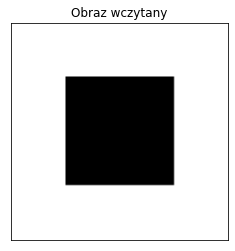

Maksymalny przepływ:  1006.0000000000024


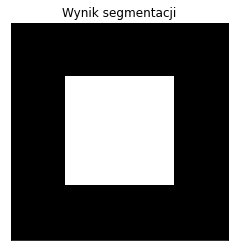

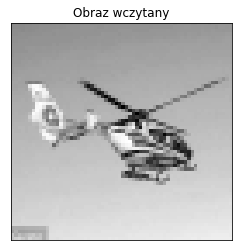

Maksymalny przepływ:  605.5238878781721


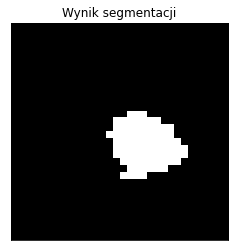

In [32]:
def main():
    result = segmentation("min_cut_seg_1.png")
    plt.figure()
    plt.imshow(result, cmap ="gray")
    plt.title('Wynik segmentacji')
    plt.xticks([]), plt.yticks([])
    plt.show()

    
    result = segmentation("min_cut_seg_2.png")
    plt.figure()
    plt.imshow(result, cmap ="gray")
    plt.title('Wynik segmentacji')
    plt.xticks([]), plt.yticks([])
    plt.show()


if __name__ == "__main__":
    main()